In [1]:
cat "/Users/mattiasappelgren/Desktop/ProbRobScene/scenarios/tableCube.prs"

from model import *

table = Table on Vector3D(0,0,0), with width 1.8, with length 0.8, with height 0.8
r1 = Robot on (top back table).position - Vector3D(0.4, 0, 0), with color "0.5"
r2 = Robot on (top back table).position + Vector3D(0.4, 0, 0)

tr_1 = Tray completely on table, ahead of r1 by 0.1, left of (top table) by 0.2
tr_2 = Tray completely on table, ahead of r2 by 0.1, right of (top table) by 0.2

c1 = Cube completely on tr_1

camera = Camera at Vector3D(table.x + (-0.1, 0.1), table.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0, 0, -1)



In [2]:
import sly

Generation 0
Generation 1


/Users/mattiasappelgren/Desktop/ProbRobScene/src/probRobScene/core/scenarios.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "block" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_location, block=block)


Generation 2


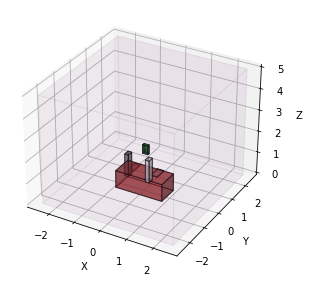

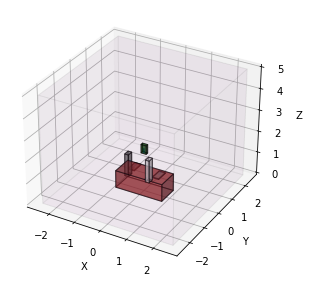

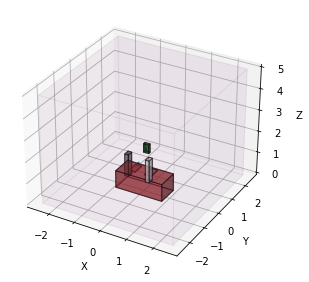

In [4]:
import probRobScene
import numpy as np

scenario = probRobScene.scenario_from_file("/Users/mattiasappelgren/Desktop/ProbRobScene/scenarios/tableCube.prs")

max_generations = 3
rejections_per_scene = []
for i in range(max_generations):
    print(f"Generation {i}")
    ex_world, used_its = scenario.generate(verbosity=2)
    rejections_per_scene.append(used_its)
    ex_world.show_3d(save_location=f"test{i}.png")
#
avg_rejections = np.average(rejections_per_scene)



In [7]:
table = scenario.objects[0]
cube = scenario.objects[5]

In [8]:
table.allProperties()

{'model_name': 'Table',
 'visibleDistance': 50,
 'orientation': (0 @ 0 @ 0),
 'width': 1.8,
 'requireVisible': True,
 'cameraOffset': (0 @ 0),
 'allowCollisions': False,
 'position': (0 @ 0 @ 0.40000000100000005),
 'length': 0.8,
 'height': 0.8,
 'color': 'brown'}

In [9]:
cube.allProperties()

{'visibleDistance': 50,
 'orientation': (0 @ 0 @ 0),
 'width': 0.04,
 'requireVisible': True,
 'cameraOffset': (0 @ 0),
 'allowCollisions': False,
 'position': <probRobScene.core.regions.PointInRegionDistribution at 0x7fabe0991730>,
 'length': 0.04,
 'height': 0.04,
 'color': 'blue',
 'shape_type': 'CUBOID'}

In [10]:
cube_position = cube.allProperties()['position']

In [11]:
cube_position.region

In [12]:
 class ProbRobDocument(object):
        
        def __init__(self, objects, constraints):
            self.objects = objects
            self.constraints = constraints
        
        @staticmethod
        def from_file(file_name: str):
            return ProbRobDocument
        
        def to_str(self) -> str:
            return
    
        def to_file(self, file_name: str) -> None:
            pass

In [13]:
class Entity(object):
    def __init__(self, name, t, length, width, height, position, direction, colour):
        self.name = name
        self.type = t
        self.height = height
        self.width = width
        self.length = length
        self.position = position
        self.direction = direction
        self.colour = colour
        
    
class Constraint(object):
    pass

class AheadOf(object):
    
    def __init__(self, entity: Entity, distance: float):
        pass

class Vector3D():
    
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    
objects = [Entity("table"), Entity("r1"), Entity("r2"), Entity("tr_1"), Entity("tr_2"), Entity("c1"), Entity("camera")]


TypeError: __init__() missing 7 required positional arguments: 't', 'length', 'width', 'height', 'position', 'direction', and 'colour'

In [14]:
objects = ["table", "r1", "r2", "tr_1", "tr_2", "c1", "camera"]
constraints = ["Table(table)", "on(table, Vector3D(0, 0, 0))", "width(table, 1.8)", "length(table, 0.8)", "height(table, 0.8)",
               "Robot(r1)", "on(r1, top)"]

In [15]:
cat "/home/mappelgren/Desktop/ProbRobScene/scenarios/tableCube.prs"

cat: /home/mappelgren/Desktop/ProbRobScene/scenarios/tableCube.prs: No such file or directory


In [16]:
import sly

In [17]:
from sly import Lexer

class CalcLexer(Lexer):
    # Set of token names.   This is always required
    tokens = { ID, NUMBER, PLUS, MINUS, TIMES,
               DIVIDE, ASSIGN, LPAREN, RPAREN}

    # String containing ignored characters between tokens
    ignore = ' \t'

    # Regular expression rules for tokens
    ID      = r'[a-zA-Z_][a-zA-Z0-9_]*'

    @_(r'\d+(\.\d+)?')
    def NUMBER(self, t):
        t.value = float(t.value)
        return t
    
    PLUS    = r'\+'
    MINUS   = r'-'
    TIMES   = r'\*'
    DIVIDE  = r'/'
    ASSIGN  = r'='
    LPAREN  = r'\('
    RPAREN  = r'\)'



data = 'x = 3 + 42.2 * (s - t)'
lexer = CalcLexer()
for tok in lexer.tokenize(data):
    print('type=%r, value=%r' % (tok.type, tok.value))

type='ID', value='x'
type='ASSIGN', value='='
type='NUMBER', value=3.0
type='PLUS', value='+'
type='NUMBER', value=42.2
type='TIMES', value='*'
type='LPAREN', value='('
type='ID', value='s'
type='MINUS', value='-'
type='ID', value='t'
type='RPAREN', value=')'


In [18]:


from sly import Parser


class CalcParser(Parser):
    # Get the token list from the lexer (required)
    tokens = CalcLexer.tokens

    # Grammar rules and actions
    @_('expr PLUS term')
    def expr(self, p):
        return p.expr + p.term

    @_('expr MINUS term')
    def expr(self, p):
        return p.expr - p.term

    @_('term')
    def expr(self, p):
        return p.term

    @_('term TIMES factor')
    def term(self, p):
        return p.term * p.factor

    @_('term DIVIDE factor')
    def term(self, p):
        return p.term / p.factor

    @_('factor')
    def term(self, p):
        return p.factor

    @_('NUMBER')
    def factor(self, p):
        return p.NUMBER

    @_('LPAREN expr RPAREN')
    def factor(self, p):
        return p.expr

lexer = CalcLexer()
parser = CalcParser()

while True:
    try:
        text = input('calc > ')
        result = parser.parse(lexer.tokenize(text))
        print(result)
    except EOFError:
        break



KeyboardInterrupt: Interrupted by user

In [19]:
class PRSLexer(Lexer):
    
    tokens = {
    ID, IMPORT, REQUIRE, CLASS, 
    
    
    WITH, TOP, BOTTOM, FRONT, BACK, LEFT, RIGHT,
    # distribution
    NORMAL, DISCRETE, VECTOR3D, 
    
    # LOGIC
    AND, OR, NOT, TRUE, FALSE,
    
    #MATH 
    NUMBER, DOUBLEEQ, NEQ, LEQ, GEQ, GT, LT, EQ, 
    MAX, MIN, PLUS, TIMES, ABS, MINUS,
    RELATIVE, BEYOND, COMPLETELY, 
    FACING, LBRACKET, RBRACKET,
    TOWARD, NOT,
    CUBOID, RECTANGLE,
    HALFSPACE, DISTANCE, ALIGNED,
    TO, AT, BY, FROM, IN, IS, OF, ON, X, Y, Z, COMMA, POINT, QUOTE, AHEAD, BELOW, ABOVE ,BEHIND
    }
    
    literals = { '+', '-', '(', ')', '*', '.', '"', ',', ':' }
    
    # names
    ignore = ' \t'
    ID = r'[a-zA-Z_][a-zA-Z0-9_]*'
    
    ID['import'] = IMPORT
    ID['require'] = REQUIRE
    ID['class'] = CLASS
    ID['with'] = WITH
    ID['top'] = TOP
    ID['bottom'] = BOTTOM
    ID['front'] = FRONT
    ID['back'] = BACK
    ID['left'] = LEFT
    ID['right'] = RIGHT
    ID['Normal'] = NORMAL
    ID['Discrete'] = DISCRETE
    ID['Vector3D'] = VECTOR3D
    ID['and'] = AND
    ID['or'] = OR
    ID['True'] = TRUE
    ID['False'] = FALSE
    ID['max'] = MAX
    ID['min'] = MIN
    ID['abs'] = ABS
    ID['relative'] = RELATIVE 
    ID['beyond'] = BEYOND
    ID['ahead'] = AHEAD
    ID['below'] = BELOW
    ID['above'] = ABOVE
    ID['behind'] = BEHIND
    ID['completely'] = COMPLETELY
    ID['facing'] = FACING
    ID['toward'] = TOWARD
    ID['CuboidRegion'] = CUBOID
    ID['Rectangle3DRegion'] = RECTANGLE
    ID['HalfspaceRegion'] = HALFSPACE
    ID['distance'] = DISTANCE
    ID['aligned'] = ALIGNED
    ID['not'] = NOT
    ID['to'] = TO
    ID['at'] = AT
    ID['by'] = BY 
    ID['from'] = FROM 
    ID['in'] = IN
    ID['is'] = IS
    ID['of'] = OF
    ID['on'] = ON
    ID['x'] = X
    ID['y'] = Y
    ID['z'] = Z

    
    @_(r'\"?\d+(\.\d+)?\"?')
    def NUMBER(self, t):
        t.value = t.value.strip('"')
        t.value = float(t.value)
        return t
    
    @_(r'\n+')
    def newline(self, t):
        self.lineno += t.value.count('\n')
    
    DOUBLEEQ = r"=="
    NEQ = r"!="
    LEQ = r"<="
    GEQ = r'>='
    GT = r'>'
    LT = r'<'
    EQ = r"="

#     PLUS = r'\+'
#     TIMES = r'\*'

#     MINUS = r'-'
#     COMMA = r','
#     LBRACKET = r'\('
#     RBRACKET = r'\)'

#     POINT = r'\.'
#     QUOTE = r'"'
    ignore_comment = r'\#.*'
   
    
    
    
    

In [47]:
class Vector3D():
    
    def __init__(self, x, y ,z):
        self.x = x
        self.y = y
        self.z = z

    def __repr__(self):
        return f"Vector3D({self.x}, {self.y}, {self.z})"
    
class Distribution():
    
    distribution_name = ""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f"{self.distribution_name}({self.x}, {self.y})"
    

class Normal(Distribution):
    
    distribution_name = "Normal"
    
# class Discrete(Distribution):
    
#     distribution_name = "Discrete"
    
class math_expr():
        
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f"{self.x} {self.name} {self.y}"

class Max(math_expr):
    
    name = "max"
    
    def __init__(self, numbers):
        self.numbers = numbers
        
    def __repr__(self):
        return f"{self.name}({self.numbers})"
    
class Min(math_expr):
    
    name = "min"
    
    def __init__(self, numbers):
        self.numbers = numbers
        
    def __repr__(self):
        return f"{self.name}({self.numbers})"
    
class Abs(math_expr):
    
    name = "abs"
    
    def __init__(self, numbers):
        self.numbers = numbers
        
    def __repr__(self):
        return f"{self.name}({self.numbers})"
    

class Plus(math_expr):
    name = "+"
    
class Minus(math_expr):
    name = "-"
    
class Times(math_expr):
    name = "*"
    
    
class DistanceFrom(math_expr):
    
    name = "distance from"
    
    def __init__(self, vector1, vector2):
        self.vector1 = vector1
        self.vector2 = vector2
        
    def __repr__(self):
        return f"distance from {self.vector1} to {self.vector2}"
    
class RelativeTo():
    
    def __init__(self, vector1, vector2):
        self.vector1 = vector1
        self.vector2 = vector2
        
    def __repr__(self):
        return f"{self.vector1} relative to {self.vector2}"
    
class BooleanExpr():
    
    name = ""
    
    def __init__(self, expr1, expr2):
        self.expr1 = expr1
        self.expr2 = expr2
        
    def __repr__(self):
        return f"{self.expr1} {self.name} {self.expr2}"

class NotBool(BooleanExpr):
    
    name = "not"
    
    def __init__(self, expr):
        self.expr = expr
        
    def __repr__(self):
        return f"not {self.expr}"
    
class AndBool(BooleanExpr):
    
    name = "and"
    
    def __init__(self, expr1, expr2):
        self.expr1 = expr1
        self.expr2 = expr2
        
    def __repr__(self):
        return f"{self.expr1} and {self.expr2}"
    
class OrBool(BooleanExpr):
    
    name = "or"
    
    def __init__(self, expr1, expr2):
        self.expr1 = expr1
        self.expr2 = expr2
        
    def __repr__(self):
        return f"{self.expr1} or {self.expr2}"
    
class EQ(BooleanExpr):
    name = "=="

class NEQ(BooleanExpr):
    name = "!="

class LT(BooleanExpr):
    name = "<"

class GT(BooleanExpr):
    name = ">"

class GEQ(BooleanExpr):
    name = ">="

class LEQ(BooleanExpr):
    name = "<="

class IsIn(BooleanExpr):
    name = "is in"
    
class CuboidRegion():
    
    def __init__(self, vector1, vector2, vector3):
        self.vector1 = vector1
        self.vector2 = vector2
        self.vector3 = vector3
        
    def __repr__(self):
        return f"CuboidRegion({self.vector1}, {self.vector2}, {self.vector3})"
    
class RectangleRegion():
    
    def __init__(self, number1, number2, vector1, vector2):
        self.number1 = number1
        self.number2 = number2
        self.vector1 = vector1
        self.vector2 = vector2
        
    def __repr__(self):
        return f"Rectangle3DRegion({self.number1}, {self.number2}, {self.vector1}, {self.vector2})"

class HalfspaceRegion():
    
    def __init__(self, vector1, vector2, number=None):
        self.vector1 = vector1
        self.vector2 = vector2
        self.number = number
        
    def __repr__(self):
        number = f", {self.number}" if self.number is not None else ""
        return f"HalfspaceRegion({self.vector1}, {self.vector2}{number})"
    
class PropConstraint():
    
    def __init__(self, prop, value):
        self.prop = prop
        self.value = value
        
    def __repr__(self):
        return f"with {self.prop} {self.value}"
    
class posConstraint():
    
    def __init__(self, prop, values):
        self.prop = prop
        self.values = values
        
    def __repr__(self):
        return f"with {self.prop} {self.value}"
    
        
class AtConstraint():
    
    def __init__(self, vector):

        self.vector = vector
        
    def __repr__(self):
        return f"at {self.vector}"
    
class BeyondConstraint():
    def __init__(self, beyond, by, from_):
        self.beyond = beyond
        self.by = by
        self.from_ = from_
    def __repr__(self):
        return f"beyond {self.beyond} by {self.by} from {self.from_}"
    
class InConstraint():
    def __init__(self, region):
        self.region = region
        
    def __repr__(self):
        return f"in {self.region}"

class OfConstraint():
    def __init__(self, direction, referent, by=None):
        self.direction = direction
        self.referent = referent
        self.by = by
        
    def __repr__(self):
        by_expr = f" by {self.by}" if self.by is not None else ""
        return f"{self.direction} of {self.referent}" + by_expr
    
class OnConstraint():
    def __init__(self, referent, completely=False):
        self.referent = referent
        self.completely = completely
        
    def __repr__(self):
        completely = "completely " if self.completely else ""
        return completely + f"on {self.referent}"
    
class AlignedWithConstraint():
    def __init__(self, referent, axis):
        self.referent = referent
        self.axis = axis
    def __repr__(self):
        return f"aligned with {self.referent} on {self.axis}"
    
class PropReference():
    
    def __init__(self, obj, prop):
        self.obj = obj
        self.prop = prop
        
    def __repr__(self):
        return f"{self.obj}.{self.prop}"
    
    
class FacingConstraint():
    def __init__(self, vector):
        self.direction = vector
        
    def __repr__(self):
        return f"facing {self.direction}"
    
class FacingTowardConstraint():
    def __init__(self, referent):
        self.direction = referent
        
    def __repr__(self):
        return f"facing toward {self.direction}"
    
class Requirement():
    def __init__(self, boolean):
        self.boolean = boolean
        
    def __repr__(self):
        return f"require {boolean}"
    
    
class Entity():
    
    def __init__(self, type_, name, constraints=None):
        if constraints is None:
            constraints = []
        self.type = type_
        self.name = name
        self.constraints = constraints
        
    def add_constraint(self, constraint):
        self.constraints.append(constraint)
        
    def __repr__(self):
        constraint_repr = " " + ', '.join([con.__repr__() for con in self.constraints])
        
        return f"{self.name} = {self.type}" + constraint_repr
    
class Import():
    
    def __init__(self, module, things):
        self.module = module
        self.things = things
        
    def __repr__(self):
        return f"from {self.module} import {self.things}"
    
class WorldModel():
    
    def __init__(self, entities, imports):
        self.imports = imports
#         self.entities = [Entity(type_, name, constraints) for name, (type_, constraints) in entities.items()]
        self.entities = entities
        
    def __repr__(self):
        return "\n".join([str(i) for i in self.imports] + [str(e) for e in self.entities])

In [44]:
print(Normal(0, 1))
print(Distribution(0, 1))

Normal(0, 1)
(0, 1)


In [51]:
class PRSParser(Parser):
    # Get the token list from the lexer (required)
    tokens = PRSLexer.tokens
    literals = PRSLexer.literals
    
    @_('scenarioop')
    def scenario(self, p):
        imports = [f for t, f in p.scenarioop if t == "import"]
        entities = [e for t, e in p.scenarioop if t == "statement"]
        return WorldModel(entities, imports)
    
    @_('statement')
    def scenarioinstance(self, p):
        return ('statement', p.statement)
    
    @_('FROM ID IMPORT "*"')
    def scenarioinstance(self, p):
        return ('import', Import(p.ID, "*"))
    
    @_('scenarioinstance')
    def scenarioop(self, p):
        return [p.scenarioinstance]
    
    @_('scenarioinstance scenarioop')
    def scenarioop(self, p):
        if p.scenarioinstance is None:
            return p.scenarioop
        else:
            return [p.scenarioinstance] + p.scenarioop
    
#     @_('region')
#     def scenario(self, p):
#         return p.region
    
#     @_('vector')
#     def scenario(self, p):
#         return p.vector
    
#     @_('distribution')
#     def scenario(self, p):
#         return p.distribution
    
#     @_('scalarplus')
#     def scenario(self, p):
#         return p.scalarplus
    
    ### statement
    
    @_('ID EQ value')
    def statement(self, p):
        type_, constraints = p.value
        return Entity(type_, p.ID, constraints)
#         return {p.ID: p.value}
    
    @_('instance')
    def statement(self, p):
        return p.instance
    
#     @_('classDef')
#     def statement(self, p):
#         return p.classDef
    
    @_('REQUIRE boolean')
    def statement(self, p):
        return Requirement(p.boolean)
    
    ### value
    ## value ::= boolean | scalar | vector | instance | property
    
    @_('boolean')
    def value(self, p):
        return p.boolean
    
    @_('scalar')
    def value(self, p):
        return p.scalar
    
    @_('vector')
    def value(self, p):
        return p.vector
    

    @_('instance')
    def value(self, p):
        return p.instance
    
    #### Instance 
    ## instance ::= classname (specif ier,)∗
    @_('ID specifierop')
    def instance(self, p):
        return p.ID, p.specifierop
    
    @_('specifier')
    def specifierop(self, p):
        return [p.specifier]
    
    @_('specifier "," specifierop')
    def specifierop(self, p):
        return [p.specifier] + p.specifierop
    
    @_('ID')
    def instance(self, p):
        return (p.ID, [])
    
    
    ### specifier 
    # specifier ::= with property value | posSpec | orientationSpec
    
    @_('WITH property_ value')
    def specifier(self, p):
        return PropConstraint(p.property_, p.value)
    
    @_('ID')
    def property_(self, p):
        return p.ID
    
    @_('ID "." ID')
    def property_(self, p):
        return PropReference(p.ID0, p.ID1)
    
    @_('sidespec "." ID')
    def property_(self, p):
        return PropReference(p.sidespec, p.ID)
    
    @_('ID "." axis')
    def property_(self, p):
        return PropReference(p.ID, p.axis)
    
    @_("'(' locsop ')' ID")
    def property_(self, p):
        return PropReference(p.ID, p.locsop)
    
    @_("posSpec")
    def specifier(self, p):
        return p.posSpec
    
    @_("orientationSpec")
    def specifier(self, p):
        return p.orientationSpec
    
    #### posSpec
#     posSpec ::= at vector
# | beyond (vector | instance) by (number | vector) from (vector | objectname)
# | in region
# | (lef t | right | ahead | . . . ) of (vector | objectname)
# | (completely)? on (vector | objectname)
# | aligned with(vector | objectname) on (x | y | z)
    
    @_('AT vector')
    def posSpec(self, p):
        return AtConstraint(p.vector)

    @_('IN region')
    def posSpec(self, p):
        return InConstraint(p.region)
    
    @_('BEYOND vorobj BY byop FROM vorobj')
    def posSpec(self, p):
        return BeyondConstraint(p.vorobj0, p.byop, p.vorobj1)
    
    @_('locsop OF vorobj')
    def posSpec(self, p):
        return OfConstraint(p.locsop, p.vorobj)
    
    @_('locsop OF vorobj BY scalar')
    def posSpec(self, p):
        return OfConstraint(p.locsop, p.vorobj, by=p.scalar)
    
    @_('ON vorobj')
    def posSpec(self, p):
        return OnConstraint(p.vorobj)
    
    @_('COMPLETELY ON vorobj')
    def posSpec(self, p):
        return OnConstraint(p.vorobj, completely=True)
    
    @_('ALIGNED WITH vorobj ON axis')
    def posSpec(self, p):
        return AlignedWithConstraint(p.vorobj, p.axis)
    
    
    #### sidespec
    @_('"(" locsop ID ")"')
    def sidespec(self, p):
        return p.ID, p.locsop
    
    
    ##### orientationSpec
#     orientationSpec ::= facing vector
#         | facing toward (vector | objectname)
   
    @_("FACING vector")
    def orientationSpec(self, p):
        return FacingConstraint(p.vector)
    
    @_("FACING TOWARD vorobj")
    def orientationSpec(self, p):
        return FacingTowardConstraint(p.vorobj)
    
    ### classDef
    
    
    
    @_('X')
    def axis(self, p):
        return p.X
    
    @_('Y')
    def axis(self, p):
        return p.Y
    
    @_('Z')
    def axis(self, p):
        return p.Z
    
    @_('vector')
    def vorobj(self, p):
        return p.vector
    
    @_('property_')
    def vorobj(self,p):
        return p.property_
    
    @_('vorobj "-" vorobj')
    def vorobj(self, p):
        return Minus(p.vorobj0, p.vorobj1)
    
    @_('vorobj "+" vorobj')
    def vorobj(self, p):
        return Plus(p.vorobj0, p.vorobj1)
    
    @_('sidespec')
    def vorobj(self, p):
        return p.sidespec
    
    @_('NUMBER')
    def byop(self,p):
        return p.NUMBER
    
    @_('vector')
    def byop(self, p):
        return p.vector
    
    
    

    
    ####
    
    @_("TOP")
    def locspec(self, p):
        return p.TOP
    
    @_("BOTTOM")
    def locspec(self, p):
        return p.BOTTOM
    
    @_("FRONT")
    def locspec(self, p):
        return p.FRONT
    
    @_("BACK")
    def locspec(self, p):
        return p.BACK
    
    @_("LEFT")
    def locspec(self, p):
        return p.LEFT
    
    @_("RIGHT")
    def locspec(self, p):
        return p.RIGHT
    
    @_("AHEAD")
    def locspec(self, p):
        return p.AHEAD
    
    @_("BEHIND")
    def locspec(self, p):
        return p.BEHIND
    
    @_("ABOVE")
    def locspec(self, p):
        return p.ABOVE
    
    @_("BELOW")
    def locspec(self, p):
        return p.BELOW
    
    @_("locspec")
    def locsop(self, p):
        return p.locspec
    
    @_("locspec locspec")
    def locsop(self, p):
        return [{p.locspec0}, {p.locspec1}]
    
    
    
    
    
    ### boolean
    ## boolean ::= True | False | boolOp
    @_('TRUE')
    def boolean(self, p):
        return p.TRUE
    
    @_('FALSE')
    def boolean(self, p):
        return p.FALSE
    
    @_('boolop')
    def boolean(self, p):
        return p.boolop
    
    ### boolop
    ##  boolOp ::= not boolean
    ##      | boolean (and | or) boolean
    ##      | scalar (== | != | < | > | >= | <=) scalar
    ##      | (vector | objectname) is in region
    
    @_('NOT boolean')
    def boolop(self, p):
        return NotBool(p.boolean)
    
    @_('boolean AND boolean')
    def boolop(self, p):
        return AndBool(p.boolean0, p.boolean1)
    
    @_('boolean OR boolean')
    def boolop(self, p):
        return OrBool(p.boolean0, p.boolean1)
    
    @_('scalar DOUBLEEQ scalar')
    def boolop(self, p):
        return EQ(p.scalar0, p.scalar1)
    
    @_('scalar NEQ scalar')
    def boolop(self, p):
        return NEQ(p.scalar0, p.scalar1)
    
    @_('scalar LT scalar')
    def boolop(self, p):
        return LT(p.scalar0, p.scalar1)
    
    @_('scalar GT scalar')
    def boolop(self, p):
        return GT(p.scalar0, p.scalar1)
    
    @_('scalar GEQ scalar')
    def boolop(self, p):
        return GEQ(p.scalar0, p.scalar1)
    
    @_('scalar LEQ scalar')
    def boolop(self, p):
        return LEQ(p.scalar0, p.scalar1)
    
    @_('vector IS IN region')
    def boolop(self, p):
        return IsIn(p.vector, p.region)
    
    @_('ID IS IN region')
    def boolop(self, p):
        return IsIn(p.ID, p.region)
    
    
    
    ### REGION
    #region ::= CuboidRegion(vector,vector,vector)
    #        | Rectangle3DRegion(number,number,vector,vector)
    #        | HalfspaceRegion(vector,vector,(number)?)
    @_('CUBOID "(" vector "," vector "," vector ")"')
    def region(self, p):
        return CuboidRegion(p.vector0, p.vector1, p.vector2)
    
    
    @_('RECTANGLE "(" NUMBER "," NUMBER "," vector "," vector ")"')
    def region(self, p):
        return RectangleRegion(p.NUMBER0, p.NUMBER1, p.vector0, p.vector1)
    
    @_('HALFSPACE "(" vector "," vector  ")"')
    def region(self, p):
        return HalfspaceRegion(p.vector0, p.vector1)
    
    @_('HALFSPACE "(" vector "," vector "," NUMBER ")"')
    def region(self, p):
        return HalfspaceRegion(p.vector0, p.vector1, p.NUMBER)
    
    ### SCALAR
    
    @_('property_')
    def scalar(self, p):
        return p.property_
    
    @_('NUMBER')
    def scalar(self, p):
        return p.NUMBER
    
    @_('distribution')
    def scalar(self, p):
        return p.distribution
    
    @_('scalarop')
    def scalar(self, p):
        return p.scalarop
    
     ### SCALAROP
    @_('scalar')
    def scalarplus(self, p):
        return [p.scalar]
    
    @_('scalarplus scalar')
    def scalarplus(self, p):
        return p.scalarplus + [p.scalar]
    
    @_('MAX "(" scalarplus ")"')
    def scalarop(self, p):
        return Max(p.scalarplus)
    
    @_('MIN "(" scalarplus ")"')
    def scalarop(self, p):
        return Min(p.scalarplus)
    
    @_('"-" scalar')
    def scalarop(self, p):
        return - p.scalar
    
    @_('ABS "(" scalar ")"')
    def scalarop(self, p):
        return Abs(p.scalar)
    
    @_('scalar "+" scalar')
    def scalarop(self, p):
        return Plus(p.scalar0, p.scalar1)
    
    @_('scalar "*" scalar')
    def scalarop(self, p):
        return Times(p.scalar0, p.scalar1)
    
    @_('DISTANCE FROM vector TO vector')
    def scalarop(self, p):
        return DistanceFrom(p.vector0, p.vector1)
    
    ### VECTOR3D
    @_('VECTOR3D "(" scalar "," scalar "," scalar ")"')
    def vector(self, p):
        return Vector3D(p.scalar0, p.scalar1, p.scalar2)
    
    @_('vectorop')
    def vector(self, p):
        return p.vectorop
    
    ### VECTOR OP
    @_('vector RELATIVE TO vector')
    def vectorop(self, p):
        return RelativeTo(p.vector0, p.vector1)
    
    ### DISTRIBTUION
    @_('"(" scalar "," scalar ")"')
    def distribution(self, p):
        return Distribution(p.scalar0, p.scalar1)
    
    @_('NORMAL "(" scalar "," scalar ")"')
    def distribution(self, p):
        return Normal(p.scalar0, p.scalar1)
    
    
   

In [52]:
f = """
from model import *

table = Table on Vector3D(0,0,0), with width 1.8, with length 0.8, with height 0.8
r1 = Robot on (top back table).position - Vector3D(0.4, 0, 0), with color "0.5"
r2 = Robot on (top back table).position + Vector3D(0.4, 0, 0)

tr_1 = Tray completely on table, ahead of r1 by 0.1, left of (top table) by 0.2
tr_2 = Tray completely on table, ahead of r2 by 0.1, right of (top table) by 0.2

c1 = Cube completely on tr_1

camera = Camera at Vector3D(table.x + (-0.1, 0.1), table.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0, 0, -1)
"""
lexer = PRSLexer()
parser = PRSParser()
result = parser.parse(lexer.tokenize(f))
result

from model import *
table = Table on Vector3D(0.0, 0.0, 0.0), with width 1.8, with length 0.8, with height 0.8
r1 = Robot on ('table', [{'top'}, {'back'}]).position - Vector3D(0.4, 0.0, 0.0), with color 0.5
r2 = Robot on ('table', [{'top'}, {'back'}]).position + Vector3D(0.4, 0.0, 0.0)
tr_1 = Tray completely on table, ahead of r1 by 0.1, left of ('table', 'top') by 0.2
tr_2 = Tray completely on table, ahead of r2 by 0.1, right of ('table', 'top') by 0.2
c1 = Cube completely on tr_1
camera = Camera at Vector3D(table.x + (-0.1, 0.1), table.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0.0, 0.0, -1.0)

In [36]:
result.imports

['model']

In [148]:
lexer = PRSLexer()
parser = PRSParser()
result = parser.parse(lexer.tokenize("Vector3D(0, 0, 0) relative to Vector3D(1, 2, 3)"))
print(result)
result = parser.parse(lexer.tokenize("(0, 0)"))
print(result)
result = parser.parse(lexer.tokenize("Normal(0, 0)"))
print(result)

result = parser.parse(lexer.tokenize("Normal(Normal(0, 1), 1)"))
print(result)

result = parser.parse(lexer.tokenize("0 1 2"))
print(result)

result = parser.parse(lexer.tokenize("Vector3D(abs(-0), max(-0 1 2), min(2))"))
print(result)

result = parser.parse(lexer.tokenize("Normal(0 + (-1, 0), 1 * 3)"))
print(result)

result = parser.parse(lexer.tokenize("Normal(distance from Vector3D(0, 1, 0) to Vector3D(1, 1, 1), 1)"))
print(result)

result = parser.parse(lexer.tokenize("hello = True and False"))
print(result)

result = parser.parse(lexer.tokenize("hello = Vector3D(0, 1, 2)"))
print(result)

result = parser.parse(lexer.tokenize("world = Normal(0 + (-1, 1), 0)"))
print(result)

result = parser.parse(lexer.tokenize("world = False or not True"))
print(result)

result = parser.parse(lexer.tokenize("world = 1 == 2"))
print(result)

result = parser.parse(lexer.tokenize("world = 1 != Normal(1, 0)"))
print(result)

result = parser.parse(lexer.tokenize("world = 1 < distance from Vector3D(1, 2, 1) to Vector3D(2, 1, 1)"))
print(result)

result = parser.parse(lexer.tokenize("world = 1 > distance from Vector3D(1, 2, 1) to Vector3D(2, 1, 1)"))
print(result)


result = parser.parse(lexer.tokenize("world = 1 >= distance from Vector3D(1, 2, 1) to Vector3D(2, 1, 1)"))
print(result)


result = parser.parse(lexer.tokenize("world = 1 <= distance from Vector3D(1, 2, 1) to Vector3D(2, 1, 1)"))
print(result)

result = parser.parse(lexer.tokenize("CuboidRegion(Vector3D(1, 2, 3), Vector3D(1, 2, 3), Vector3D(1, 2, 3))"))
print(result)

result = parser.parse(lexer.tokenize("world = Table is in CuboidRegion(Vector3D(1, 2, 3), Vector3D(1, 2, 3), Vector3D(1, 2, 3))"))
print(result)

result = parser.parse(lexer.tokenize("world = Table with colour green"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup"))
print(result)

result = parser.parse(lexer.tokenize("world = Table with cup1.q 3"))
print(result)

result = parser.parse(lexer.tokenize("world = Table with (top, right) table 3"))
print(result)

result = parser.parse(lexer.tokenize("world = Table beyond cup1 by 3 from Vector3D(0, 1, 2)"))
print(result)

result = parser.parse(lexer.tokenize("world = Table in Rectangle3DRegion(1, 2, Vector3D(0,1,2), Vector3D(0,1,2))"))
print(result)

result = parser.parse(lexer.tokenize("world = Table in HalfspaceRegion(Vector3D(0,1,2), Vector3D(0,1,2))"))
print(result)

result = parser.parse(lexer.tokenize("world = Table in HalfspaceRegion(Vector3D(0,1,2), Vector3D(0,1,2), 9)"))
print(result)

result = parser.parse(lexer.tokenize("world = Table left of cup1"))
print(result)

result = parser.parse(lexer.tokenize("world = Table on cup1"))
print(result)

result = parser.parse(lexer.tokenize("world = Table completely on Vector3D(0, 0, 0)"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup aligned with cup2 on y"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup facing toward Vector3D(0, 0, 0)"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup facing toward robot1"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup facing Vector3D(0, -1, 0)"))
print(result)

result = parser.parse(lexer.tokenize("cup1 = Cup facing Vector3D(0, -1, 0), on table1, with colour green"))
print(result)

None
None
None
None
None
None
None
None


sly: Syntax error at line 1, token=VECTOR3D
sly: Syntax error at line 1, token=(
sly: Syntax error at line 1, token=NORMAL
sly: Syntax error at line 1, token=NORMAL
sly: Syntax error at line 1, token=NUMBER
sly: Syntax error at line 1, token=VECTOR3D
sly: Syntax error at line 1, token=NORMAL
sly: Syntax error at line 1, token=NORMAL


TypeError: __str__ returned non-string (type NoneType)

In [296]:
l1 ="from model import *"

l2 = "table = Table on Vector3D(0,0,0), with width 1.8, with length 0.8, with height 0.8"
l3 = 'r1 = Robot on (top back table).position - Vector3D(0.4, 0, 0), with color "0.5"'
l4 = "r2 = Robot on (top back table).position + Vector3D(0.4, 0, 0)"

l5 = "tr_1 = Tray completely on table, ahead of r1 by 0.1, left of (top table) by 0.2"
l6 = "tr_2 = Tray completely on table, ahead of r2 by 0.1, right of (top table) by 0.2"

l7 = "c1 = Cube completely on tr_1"

l8 = "camera = Camera at Vector3D(table.x + (-0.1, 0.1), table.y + (-0.1, 0.1), (1.9, 2.1)), facing Vector3D(0, 0, -1)"

l9 = "CuboidRegion(Vector3D(1, 2, 3), Vector3D(1, 2, 3), Vector3D(1, 2, 3))"

lines = [l1, l2, l3, l4, l5, l6, l7, l8]
lines = [l9]

for data in lines:
    lexer = PRSLexer()
    print()
    print("Lexed this line:", data)
    print
    for tok in lexer.tokenize(data):
        print('type=%r, value=%r' % (tok.type, tok.value))


Lexed this line: CuboidRegion(Vector3D(1, 2, 3), Vector3D(1, 2, 3), Vector3D(1, 2, 3))
type='CUBOID', value='CuboidRegion'
type='(', value='('
type='VECTOR3D', value='Vector3D'
type='(', value='('
type='NUMBER', value=1.0
type=',', value=','
type='NUMBER', value=2.0
type=',', value=','
type='NUMBER', value=3.0
type=')', value=')'
type=',', value=','
type='VECTOR3D', value='Vector3D'
type='(', value='('
type='NUMBER', value=1.0
type=',', value=','
type='NUMBER', value=2.0
type=',', value=','
type='NUMBER', value=3.0
type=')', value=')'
type=',', value=','
type='VECTOR3D', value='Vector3D'
type='(', value='('
type='NUMBER', value=1.0
type=',', value=','
type='NUMBER', value=2.0
type=',', value=','
type='NUMBER', value=3.0
type=')', value=')'
type=')', value=')'


In [183]:
constructorStatements = ('class', 'constructor')

Constructor = namedtuple('Constructor', ('name', 'parent', 'specifiers'))

point3dSpecifiers = {
    ('at',): 'At3D',
    ('in',): 'In3D',
    ('on',): 'OnTopOf',
    ('aligned', 'with'): 'AlignedWith',
    ('completely', 'on'): 'OnTopOfStrict',
    ('beyond',): 'Beyond3D',
    ('offset', 'by'): 'OffsetBy3D',
    ('facing',): 'Facing3D',
    ('facing', 'toward'): 'FacingToward3D',
    ('left', 'of'): 'LeftRough',
    ('right', 'of'): 'RightRough',
    ('ahead', 'of'): 'AheadRough',
    ('behind',): 'Behind3D',
    ('above',): 'Above3D',
    ('below',): 'Below3D',
    ('following',): 'Following3D',
}

orientedPoint3DSpecifiers = {

}

objectSpecifiers = {
}

builtinConstructors = {
    'Point3D': Constructor('Point3D', None, point3dSpecifiers),
    'OrientedPoint3D': Constructor('OrientedPoint3D', 'Point3D', orientedPoint3DSpecifiers),
    'Object': Constructor('Object', 'OrientedPoint3D', objectSpecifiers)
}
functionStatements.update(builtinConstructors)

# Prefix operators
prefixOperators = {
    ('relative', 'position'): 'RelativePosition',
    ('relative', 'heading'): 'RelativeHeading',
    ('apparent', 'heading'): 'ApparentHeading',
    ('distance', 'from'): 'DistanceFrom',
    ('distance', 'to'): 'DistanceFrom',
    ('front', 'left'): 'FrontLeft',
    ('front', 'right'): 'FrontRight',
    ('back', 'left'): 'BackLeft',
    ('back', 'right'): 'BackRight',
    ('front',): 'Front',
    ('back',): 'Back',
    ('left',): 'Left',
    ('right',): 'Right',
    ('top', 'front'): 'TopFront',
    ('top', 'back'): 'TopBack',
    ('top',): 'Top',
    ('bottom',): 'Bottom'
}
assert all(1 <= len(op) <= 2 for op in prefixOperators)
prefixIncipits = {op[0] for op in prefixOperators}
assert not any(op in functionStatements for op in prefixIncipits)

## Infix operators

# pseudo-operator for encoding argument packages for (3+)-ary ops
packageToken = (RIGHTSHIFT, '>>')
packageNode = RShift

InfixOp = namedtuple('InfixOp', ('syntax', 'implementation', 'arity', 'token', 'node'))
infixOperators = (
    # existing Python operators with new semantics
    InfixOp('@', 'Vector', 2, None, MatMult),

    # operators not in Python (in decreasing precedence order)
    InfixOp('at', 'FieldAt', 2, (LEFTSHIFT, '<<'), LShift),
    InfixOp('relative to', 'RelativeTo', 2, (AMPER, '&'), BitAnd),
    InfixOp('offset by', 'RelativeTo', 2, (AMPER, '&'), BitAnd),
    InfixOp('offset along', 'OffsetAlong', 3, (CIRCUMFLEX, '^'), BitXor),
    InfixOp('can see', 'CanSee', 2, (VBAR, '|'), BitOr),

    # just syntactic conveniences, not really operators
    InfixOp('from', None, 2, (COMMA, ','), None),
    InfixOp('for', None, 2, (COMMA, ','), None),
    InfixOp('to', None, 2, (COMMA, ','), None),
    InfixOp('by', None, 2, packageToken, None)
)
